<a href="https://colab.research.google.com/github/nalaurandrade/TrabalhoFinalEstatistica/blob/main/Trabalho_final_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls "/content/drive/MyDrive/SI/Estatística computacional/Trabalho final - P2"

 indicadores.xlsx  'Trabalho final - P2'


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Carrega a base e imprime os dados registrados na base
data = pd.read_excel("/content/drive/MyDrive/SI/Estatística computacional/Trabalho final - P2/indicadores.xlsx")
print(data.head(127))

      ano      rede       ensino anos_escolares  taxa_aprovacao  \
0    2005  estadual  fundamental   finais (6-9)             763   
1    2007  estadual  fundamental   finais (6-9)             787   
2    2009  estadual  fundamental   finais (6-9)             805   
3    2011  estadual  fundamental   finais (6-9)             823   
4    2013  estadual  fundamental   finais (6-9)             851   
..    ...       ...          ...            ...             ...   
121  2013     total        medio    todos (1-4)             801   
122  2015     total        medio    todos (1-4)             817   
123  2017     total        medio    todos (1-4)             831   
124  2019     total        medio    todos (1-4)             861   
125  2021     total        medio    todos (1-4)             908   

     indicador_rendimento  nota_saeb_matematica  nota_saeb_lingua_portuguesa  \
0                76363516                 23286                         2266   
1                78712749          

Cálculo da média

In [ ]:
col1 = 'nota_saeb_media_padronizada'
df = data[[col1]]
media = df[col1].mean()
print("A média das notas da saeb é:", media)

A média das notas da saeb é: 4889765651.420635


In [ ]:
col2 = 'nota_saeb_lingua_portuguesa'
df2 = data[[col2]]
media2 = df2[col2].mean()
print("A média da prova de língua portuguesa é:", media2)


A média da prova de língua portuguesa é: 21726.73015873016


Cálculo da mediana

In [ ]:
col1 = 'nota_saeb_media_padronizada'

df = data[[col1]]
mediana = df[col1].median()
print("A mediana das notas da saeb é:", mediana)


A mediana das notas da saeb é: 50361213.5


In [ ]:
col2 = 'nota_saeb_lingua_portuguesa'

df2 = data[[col2]]
mediana = df2[col2].median()
print("A mediana das notas de língua portuguesa é:", mediana)

A mediana das notas de língua portuguesa é: 23872.0


Determinação do valor máximo

In [ ]:
col1 = 'nota_saeb_media_padronizada'

df = data[[col1]]
maximo = df[col1].max()
print("O valor máximo é:", maximo)


O valor máximo é: 71088906838


Determinação do valor mínimo

In [ ]:
col1 = 'nota_saeb_media_padronizada'

df = data[[col1]]
minimo = df[col1].min()
print("O valor mínimo é:", minimo)


O valor mínimo é: 49375


Cálculo do valor p

In [ ]:
from scipy import stats

col1 = 'nota_saeb_matematica'
col2 = 'nota_saeb_lingua_portuguesa'

x = data[col1]
y = data[col2]

# Teste de correlação de Pearson → retorna r e p
r, p_valor = stats.pearsonr(x, y)

print("Valor p:", p_valor)


Valor p: 0.2638672542520427


Regressão linear

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

%matplotlib inline

     ano       rede       ensino anos_escolares  taxa_aprovacao  \
0   2005   estadual  fundamental   finais (6-9)             763   
1   2007   estadual  fundamental   finais (6-9)             787   
2   2009   estadual  fundamental   finais (6-9)             805   
3   2011   estadual  fundamental   finais (6-9)             823   
4   2013   estadual  fundamental   finais (6-9)             851   
5   2015   estadual  fundamental   finais (6-9)             853   
6   2017   estadual  fundamental   finais (6-9)             868   
7   2019   estadual  fundamental   finais (6-9)              90   
8   2021   estadual  fundamental   finais (6-9)             958   
9   2005  municipal  fundamental   finais (6-9)             732   
10  2007  municipal  fundamental   finais (6-9)             776   
11  2009  municipal  fundamental   finais (6-9)             786   
12  2011  municipal  fundamental   finais (6-9)             811   
13  2013  municipal  fundamental   finais (6-9)              8

<Figure size 1000x600 with 0 Axes>

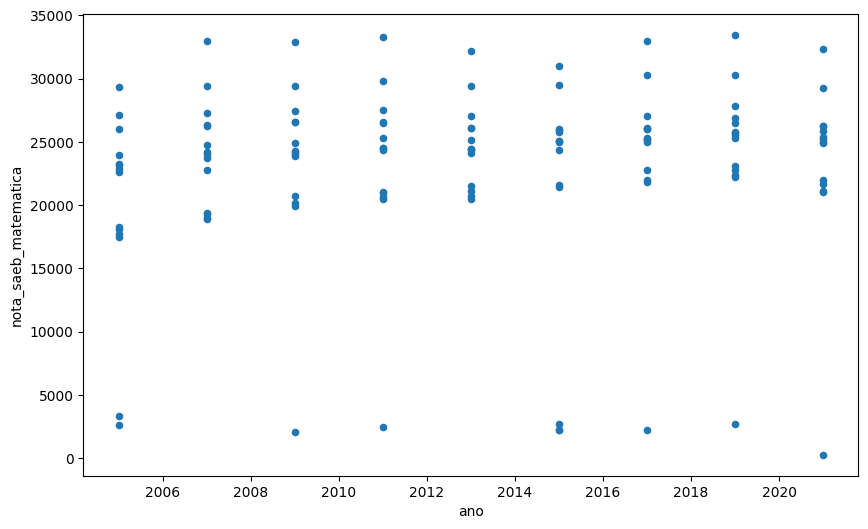

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/SI/Estatística computacional/Trabalho final - P2/indicadores.xlsx")
print(data.head(20))

plt.figure(figsize=(10,6))
data.plot(kind='scatter', x='ano', y='nota_saeb_matematica', figsize=(10,6))
plt.show()

In [ ]:
feature_cols = ['ano']
X = data[feature_cols]

y = data['nota_saeb_matematica']

lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [ ]:
print("Valor de Beta_0:", lm.intercept_)
print("Valor de Beta_1:", lm.coef_[0])

Valor de Beta_0: -206071.29920634924
Valor de Beta_1: 113.84047619047621


In [ ]:
print("Predições:")
print(lm.predict([[2010]]))
print(lm.predict([[2015]]))
print(lm.predict([[2020]]))

Predições:
[22748.05793651]
[23317.26031746]
[23886.46269841]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
# Construindo reta
X_new = pd.DataFrame({'ano': [data.ano.min(), data.ano.max()]})
preds = lm.predict(X_new)

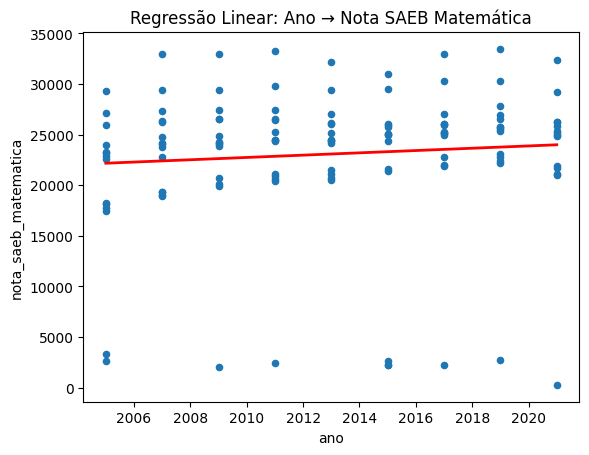

In [ ]:
# gráfico final
data.plot(kind='scatter', x='ano', y='nota_saeb_matematica')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.title("Regressão Linear: Ano → Nota SAEB Matemática")
plt.show()

Análise de distribuições

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/SI/Estatística computacional/Trabalho final - P2/indicadores.xlsx")

col = "nota_saeb_matematica"

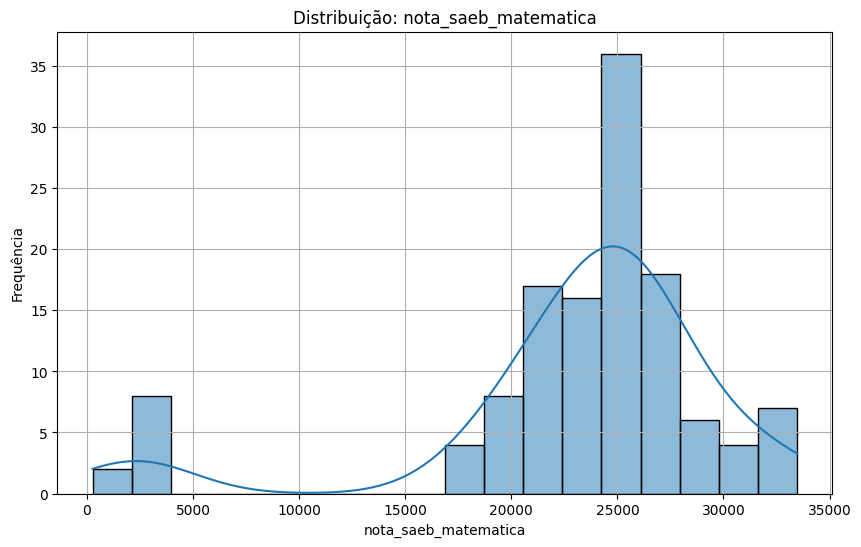

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data[col], kde=True)
plt.title("Distribuição: " + col)
plt.xlabel(col)
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

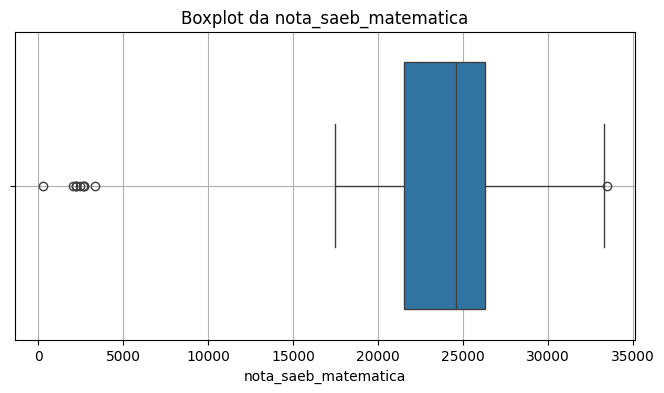

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=data[col])
plt.title("Boxplot da " + col)
plt.xlabel(col)
plt.grid(True)
plt.show()

In [ ]:
print("Análise da distribuição")
print(data[col].describe())

Análise da distribuição
count      126.000000
mean     23089.579365
std       7014.593285
min        271.000000
25%      21533.250000
50%      24623.000000
75%      26283.750000
max      33472.000000
Name: nota_saeb_matematica, dtype: float64


Geração dos gráficos correspondentes às análises realizadas

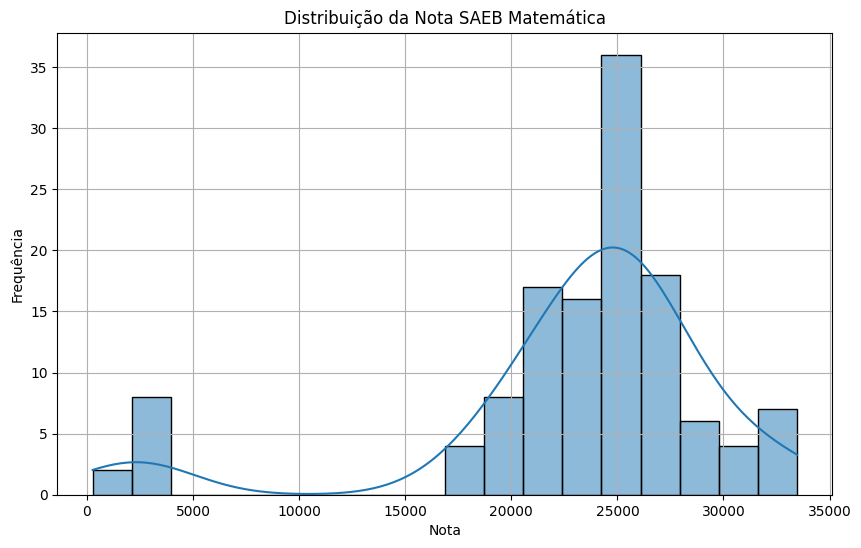

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

col = "nota_saeb_matematica"

plt.figure(figsize=(10,6))
sns.histplot(data[col], kde=True)
plt.title("Distribuição da Nota SAEB Matemática")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()


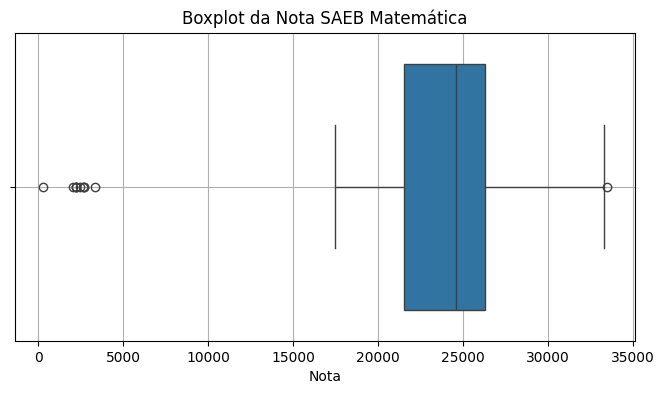

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=data[col])
plt.title("Boxplot da Nota SAEB Matemática")
plt.xlabel("Nota")
plt.grid(True)
plt.show()


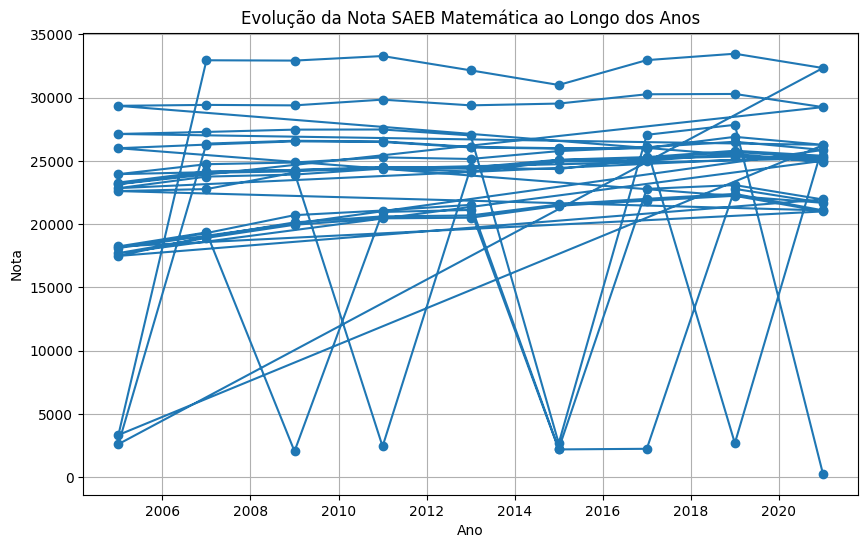

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data['ano'], data[col], marker='o')
plt.title("Evolução da Nota SAEB Matemática ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Nota")
plt.grid(True)
plt.show()

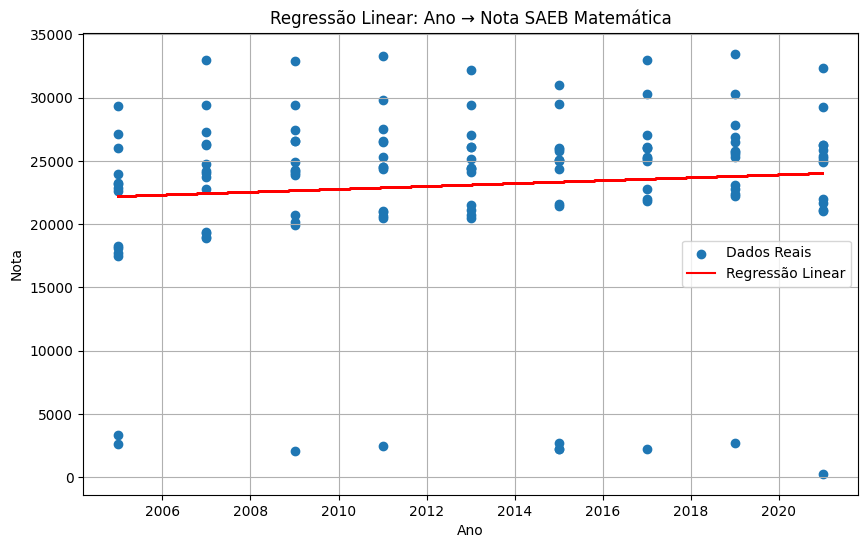

In [ ]:
from sklearn.linear_model import LinearRegression

X = data[['ano']]
y = data[col]

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)

plt.figure(figsize=(10,6))
plt.scatter(X, y, label='Dados Reais')
plt.plot(X, y_pred, color='red', label='Regressão Linear')
plt.title("Regressão Linear: Ano → Nota SAEB Matemática")
plt.xlabel("Ano")
plt.ylabel("Nota")
plt.grid(True)
plt.legend()
plt.show()


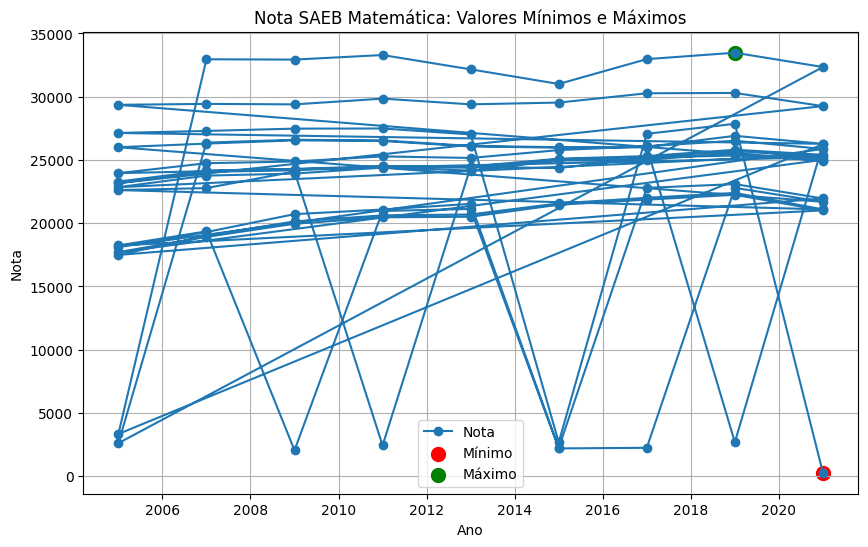

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data['ano'], data[col], marker='o', label="Nota")
plt.scatter([data['ano'].iloc[data[col].idxmin()]],
            [data[col].min()],
            color='red', s=100, label="Mínimo")

plt.scatter([data['ano'].iloc[data[col].idxmax()]],
            [data[col].max()],
            color='green', s=100, label="Máximo")

plt.title("Nota SAEB Matemática: Valores Mínimos e Máximos")
plt.xlabel("Ano")
plt.ylabel("Nota")
plt.legend()
plt.grid(True)
plt.show()
